# Self-Perception of Weight Among College Students

### Alyssa Hu and Jixuan Wang

### Introduction

In this project, we will be looking into different factors that can affect a college student's self-perception of weight. Self-perception of weight has notably been studied by the NIH, such as with [adolescents](https://www.ncbi.nlm.nih.gov/pubmed/20142281), [young women](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3005306/ for women), and consideration of [sociodemographic factors](https://www.ncbi.nlm.nih.gov/pubmed/12726871) (this study uses logistic regression - which we will also be discussing later)! Learning about this information is useful for counseling purposes to understand patient perspectives of weight and to help with respect to weight management.

[Studies](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4554432/) have indicated that "unhealthy body image is associated with obesity and physical inactivity and plays a pivotal role in the development of eating disorders during adolescence." Our project focuses on predicting people's self-perception of their weight. This sort of analysis may have important impact for counseling personnel - its predictions may suggest if a college student is likely to have unhealthy body image and hopefully allow for earlier intervention. 

We will be working with a dataset containing survey results of college students. One particular survey question we are interested in is "self_perception_weight" in which the respondent ranked how they perceive themselves (1 - slim, 2 - very fit, 3 - just right, 4 - slightly overweight, 5 - overweight, 6 - I dont think of myself in these terms), and we will see if we can classify this based on the remainder of their responses.

### Tutorial Content

In this tutorial, we will get hands-on with the survey data of college students! By the end, you will have learned:
1. How to get the food and health data from the CSV file into a dataframe format (so that Python can read it)
2. How to process the data, removing any unnecessary information and replacing any missing or meaningless data
3. How to proceed with exploratory data analaysis, creating plots to help with visualization and developing hypotheses 
4. How to create classifiers and test hypotheses with machine learning

The data we will be working with can be found here:
https://www.kaggle.com/borapajo/food-choices/data

### Libraries

For this tutorial, we suggest using [Anaconda](https://www.anaconda.com/download/) in order to work with Python and its libraries. An alternative is [Docker](https://docs.docker.com/engine/installation/).

Also, the following libraries will need to be imported:
#### pandas
[pandas](http://pandas.pydata.org/) is a open-source Python library that helps with creating data structures (such as dataframes) to perform data analysis. 
#### numpy
[NumPy](http://www.numpy.org/) is used for scientific computing in Python often used for creating arrays. In our case, we also want to use its nan (not a number) value. 
#### matplotlib & ggplot
[Matplotlib](http://matplotlib.org/) and [ggplot](ggplot.yhathq.com/) are both used to generate plots of our data. Specifically, ggplot is able to create violin plots, which we use below. 
#### sklearn
[Scikit-learn](http://scikit-learn.org/stable/index.html) provides tools for machine learning for classification.


In [30]:
# In order to import these libraries: 
import pandas
import numpy
import matplotlib.pyplot as plt
from ggplot import *

#These specific sklearn tools will be explained in detail in the ML section
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

### Data Curation, Parsing, and Management

Now that we have the libraries installed, we will load our data into a DataFrame with Pandas' read_csv method. This takes a comma separated value document and converts it into a DataFrame, convenient for data management and analysis. For what the data means, the codebook_food.docx file from the download link goes in depth.

In [31]:
# load the file
food = pandas.read_csv("food_coded.csv")
food.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


There were 61 columns in our data! Some of them will not necessarily help us when it comes to learning about their weight perception. For example, the professions of parents (father_profession, mother_profession) may or may not seem very relevant to predicting how someone feels about their weight. For our analysis and for demonstration purposes, we will show how to drop specific columns of a DataFrame.

There are also columns in the dataframe that are entirely text-based, such as comfort_food and comfort_food_reasons. It is possible to use Natural Language Processing to extract meaningful results for analysis. In this dataset, this is actually already done for several variables (ex. comfort_food_reasons and comfort_food_reasons_coded). In our analysis, we will be dropping the uncoded columns. If you're interested, feel free to check out the following resource to learn more about [how Natural Language Processing can be used](https://blog.algorithmia.com/introduction-natural-language-processing-nlp/) and practice yourself with [DataCamp's NLP Course](https://www.datacamp.com/courses/natural-language-processing-fundamentals-in-python).



#### Handling Unnecessary Data

The following command drops the column named 'GPA'. We pass in 'GPA' as the first term and specify if we want to drop rows (axis=0) or columns (axis=1) in the second term. See [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) for more information!

In [32]:
# this drops the GPA column
food = food.drop('GPA',axis=1)
food.head()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,2.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


Alternatively, the drop command also accepts a list of columns to be dropped. Below, we pass in the remaining columns that we will be removing and not using in this analysis as the first term and once again specify we want to drop columns (axis=1) in the second term. 

In [33]:
# this drops all the columns we will be excluding in this tutorial
food = food.drop(['breakfast','calories_chicken','calories_scone','coffee', 'comfort_food',
                  'comfort_food_reasons', 'comfort_food_reasons_coded.1',
                  'cuisine', 'diet_current','drink','eating_changes',
                  'employment', 'ethnic_food','father_education',
                  'father_profession','fav_cuisine','fav_cuisine_coded', 
                  'fav_food','food_childhood','fries', 'greek_food',
                  'healthy_meal','ideal_diet','ideal_diet_coded',
                  'indian_food','italian_food','meals_dinner_friend',
                  'mother_education', 'mother_profession','persian_food',
                  'soup','thai_food', 'tortilla_calories','turkey_calories',
                  'type_sports','waffle_calories','marital_status'], axis=1)
food.head()

,Gender,calories_day,comfort_food_reasons_coded,cook,diet_current_coded,eating_changes_coded,eating_changes_coded1,eating_out,exercise,fruit_day,...,life_rewarding,nutritional_check,on_off_campus,parents_cook,pay_meal_out,self_perception_weight,sports,veggies_day,vitamins,weight
0,2,NaN,9.0,2.0,1,1,1,3,1.0,5,...,1.0,5,1.0,1,2,3.0,1.0,5,1,187
1,1,3.0,1.0,3.0,2,1,2,2,1.0,4,...,1.0,4,1.0,1,4,3.0,1.0,4,2,155
2,1,4.0,1.0,1.0,3,1,3,2,2.0,5,...,7.0,4,2.0,1,3,6.0,2.0,5,1,I'm not answering this.
3,1,3.0,2.0,2.0,2,1,3,2,3.0,4,...,2.0,2,1.0,1,2,5.0,2.0,3,1,"Not sure, 240"
4,1,2.0,1.0,1.0,2,3,4,2,1.0,4,...,1.0,3,1.0,1,4,4.0,1.0,4,2,190


#### Reformatting DataFrame

Now that we have the columns we want, we may wish to reorder our columns in a way that makes more sense, such as putting variables of more significance first. As we are interested in self perception of weight and will likely look at actual weight later on, we will move the 'self_perception_weight' and 'weight' columns to the front. DataFrames have a reindex method, which takes a list of reordered column names and reorders the DataFrame accordingly. Below, we take the current list of columns, move the column weight to the front, move the column self_perception_weight in front of that, and then run the reindex command so we end up with our newly ordered DataFrame.

In [34]:
# get the columns as a list
cols = food.columns.tolist()
# move the desired columns to the front
cols.insert(0, cols.pop(cols.index('weight')))
cols.insert(0, cols.pop(cols.index('self_perception_weight')))
# reorder!
food = food.reindex(columns=cols)
food.head()

,self_perception_weight,weight,Gender,calories_day,comfort_food_reasons_coded,cook,diet_current_coded,eating_changes_coded,eating_changes_coded1,eating_out,...,healthy_feeling,income,life_rewarding,nutritional_check,on_off_campus,parents_cook,pay_meal_out,sports,veggies_day,vitamins
0,3.0,187,2,NaN,9.0,2.0,1,1,1,3,...,2,5.0,1.0,5,1.0,1,2,1.0,5,1
1,3.0,155,1,3.0,1.0,3.0,2,1,2,2,...,5,4.0,1.0,4,1.0,1,4,1.0,4,2
2,6.0,I'm not answering this.,1,4.0,1.0,1.0,3,1,3,2,...,6,6.0,7.0,4,2.0,1,3,2.0,5,1
3,5.0,"Not sure, 240",1,3.0,2.0,2.0,2,1,3,2,...,7,6.0,2.0,2,1.0,1,2,2.0,3,1
4,4.0,190,1,2.0,1.0,1.0,2,3,4,2,...,6,6.0,1.0,3,1.0,1,4,1.0,4,2


Yikes! There are some non-numeric answers in this table where there should be numbers (e.g. the weight column), since certain parts of the survey were left as free response. Note entries in the weight column of index 2 ('I'm not answering this.') and index 3 ('Not sure, 240').

#### Missing Data

How do we handle such cases? This is an example of 'Missing Not at Random' (MNAR) data, in which the data itself has something to do with why it's missing. (You can learn more about missing data [here](http://onbiostatistics.blogspot.com/2012/10/missingness-mechanism-mcar-mar-and-mnar.html) and [here](https://statisticalhorizons.com/missing-at-random)). Weight can be a sensitive issue for some people, and as such they may choose not to disclose it. Luckily, this happens very infrequently in our dataset. When it does happen, we must discard the data, but for an answer such as 'Not sure, 240' we can extract the number from the response.

In order to do this we can use [Regex](http://www.rexegg.com/regex-quickstart.html#ref), a way to pattern match on characters. If you are not very confident with your regex, feel free to [check it here](https://regex101.com/). We use the DataFrame replace method, which accepts a regex and replaces it with a desired string. Since our table has floats, we use the outer parentheses on (\d(\.\d+)?) to indicate a grouping and capture that float. Here, the first \d means to look for a digit and (\.\d+)? takes into account any possible decimal values with the float (the ? indicates that it is an optional part). The [^0-9\.]\* helps us match anything that isn't supposed to be part of a float (zero or more characters that aren't numbers or periods), which will be removed - the match will be replaced by just the float grouping.

In [35]:
# extracts floats from responses that are not entirely floats
food = food.replace(r'[^0-9\.]*(\d(\.\d+)?)[^0-9\.]*', '\g<1>',regex=True)
food.head()

,self_perception_weight,weight,Gender,calories_day,comfort_food_reasons_coded,cook,diet_current_coded,eating_changes_coded,eating_changes_coded1,eating_out,...,healthy_feeling,income,life_rewarding,nutritional_check,on_off_campus,parents_cook,pay_meal_out,sports,veggies_day,vitamins
0,3.0,187,2,NaN,9.0,2.0,1,1,1,3,...,2,5.0,1.0,5,1.0,1,2,1.0,5,1
1,3.0,155,1,3.0,1.0,3.0,2,1,2,2,...,5,4.0,1.0,4,1.0,1,4,1.0,4,2
2,6.0,I'm not answering this.,1,4.0,1.0,1.0,3,1,3,2,...,6,6.0,7.0,4,2.0,1,3,2.0,5,1
3,5.0,240,1,3.0,2.0,2.0,2,1,3,2,...,7,6.0,2.0,2,1.0,1,2,2.0,3,1
4,4.0,190,1,2.0,1.0,1.0,2,3,4,2,...,6,6.0,1.0,3,1.0,1,4,1.0,4,2


Note that the index 3 entry now has 240 as the weight. However, we are still left with instances of all text, such as in index 2.
We will use another regex to replace these with 'NaN' - not a number.
The following regex [^0-9\.]+ matches one or more characters that aren't numbers or periods (which would not be allowed characters in a numerical response).

In [36]:
# replaces non-numeric responses with NaN
food = food.replace(r'[^0-9\.]+',numpy.nan,regex=True)
food.head()

,self_perception_weight,weight,Gender,calories_day,comfort_food_reasons_coded,cook,diet_current_coded,eating_changes_coded,eating_changes_coded1,eating_out,...,healthy_feeling,income,life_rewarding,nutritional_check,on_off_campus,parents_cook,pay_meal_out,sports,veggies_day,vitamins
0,3.0,187,2,NaN,9.0,2.0,1,1,1,3,...,2,5.0,1.0,5,1.0,1,2,1.0,5,1
1,3.0,155,1,3.0,1.0,3.0,2,1,2,2,...,5,4.0,1.0,4,1.0,1,4,1.0,4,2
2,6.0,NaN,1,4.0,1.0,1.0,3,1,3,2,...,6,6.0,7.0,4,2.0,1,3,2.0,5,1
3,5.0,240,1,3.0,2.0,2.0,2,1,3,2,...,7,6.0,2.0,2,1.0,1,2,2.0,3,1
4,4.0,190,1,2.0,1.0,1.0,2,3,4,2,...,6,6.0,1.0,3,1.0,1,4,1.0,4,2


Finally, for the purposes of our analysis, we cannot impute (replace or substitite) any missing data, and thus any row with a NaN in a response will have to be dropped. The DataFrame dropna method does this for us. We specify axis=0 to indicate we want to drop any rows that have a NaN response.

In [37]:
# remove all NaNs
food = food.dropna(axis=0)
food.head()

,self_perception_weight,weight,Gender,calories_day,comfort_food_reasons_coded,cook,diet_current_coded,eating_changes_coded,eating_changes_coded1,eating_out,...,healthy_feeling,income,life_rewarding,nutritional_check,on_off_campus,parents_cook,pay_meal_out,sports,veggies_day,vitamins
1,3.0,155,1,3.0,1.0,3.0,2,1,2,2,...,5,4.0,1.0,4,1.0,1,4,1.0,4,2
3,5.0,240,1,3.0,2.0,2.0,2,1,3,2,...,7,6.0,2.0,2,1.0,1,2,2.0,3,1
4,4.0,190,1,2.0,1.0,1.0,2,3,4,2,...,6,6.0,1.0,3,1.0,1,4,1.0,4,2
5,5.0,190,1,3.0,4.0,3.0,2,1,3,1,...,4,1.0,4.0,1,1.0,2,5,2.0,1,2
6,4.0,180,2,3.0,1.0,2.0,3,2,5,2,...,4,4.0,8.0,4,2.0,2,2,1.0,4,1


Recall that self_perception_weight asks respondent to rank how they perceive themselves (1 - slim, 2 - very fit, 3 - just right, 4 - slightly overweight, 5 - overweight, 6 - I dont think of myself in these terms). Since we are trying to predict self_perception_weight, we would like to exclude option 6 as it is not within the continuum of values. To obtain the rows where self_perception_weight is not 6 and obtain a new dataframe, we run the following command:

In [38]:
# only keep data where people responded with their perception
food = food[food['self_perception_weight']!=6]

Finally, we want to make our data consistent. Some responses may be strings of numerics, which we do not want. The DataFrame method apply will apply a function (in this case, pandas.to_numeric) to the entire dataframe.

In [39]:
# make the data consistent in that they are all numeric responses
food = food.apply(pandas.to_numeric, errors='ignore')
food.head()

,self_perception_weight,weight,Gender,calories_day,comfort_food_reasons_coded,cook,diet_current_coded,eating_changes_coded,eating_changes_coded1,eating_out,...,healthy_feeling,income,life_rewarding,nutritional_check,on_off_campus,parents_cook,pay_meal_out,sports,veggies_day,vitamins
1,3.0,155,1,3.0,1.0,3.0,2,1,2,2,...,5,4.0,1.0,4,1.0,1,4,1.0,4,2
3,5.0,240,1,3.0,2.0,2.0,2,1,3,2,...,7,6.0,2.0,2,1.0,1,2,2.0,3,1
4,4.0,190,1,2.0,1.0,1.0,2,3,4,2,...,6,6.0,1.0,3,1.0,1,4,1.0,4,2
5,5.0,190,1,3.0,4.0,3.0,2,1,3,1,...,4,1.0,4.0,1,1.0,2,5,2.0,1,2
6,4.0,180,2,3.0,1.0,2.0,3,2,5,2,...,4,4.0,8.0,4,2.0,2,2,1.0,4,1


### Exploratory Data Analysis

Now let's begin to look at some interesting aspects of the data by plotting.
Let's try making a scatter plot for grade_level and weight perception.

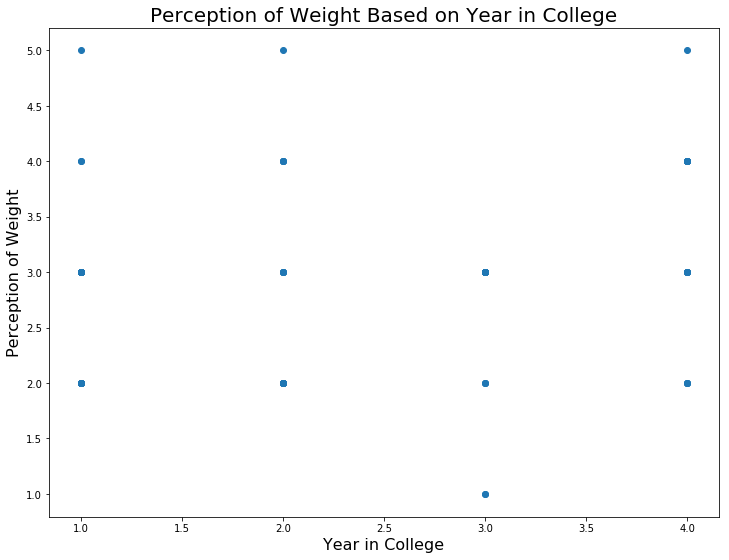

In [40]:
# prepare a plot
fig, ax = plt.subplots()
fig.set_size_inches(12,9)

# set the labels
ax.set_title('Perception of Weight Based on Year in College', fontsize=20)
ax.set_xlabel('Year in College', fontsize=16)
ax.set_ylabel('Perception of Weight', fontsize=16)

# plot the points
ax.scatter(food['grade_level'],food['self_perception_weight'])
plt.show()

We notice that because our data is fairly categorical (Freshman, Sophomore, Junior, Senior), we end up with a scatter plot that consist of dots in vertical lines, some of which is fairly concentrated, while others are spread out. This really doesn't give us much information. A violin plot better suits our purposes and shows us the actual distributions for each grade level.


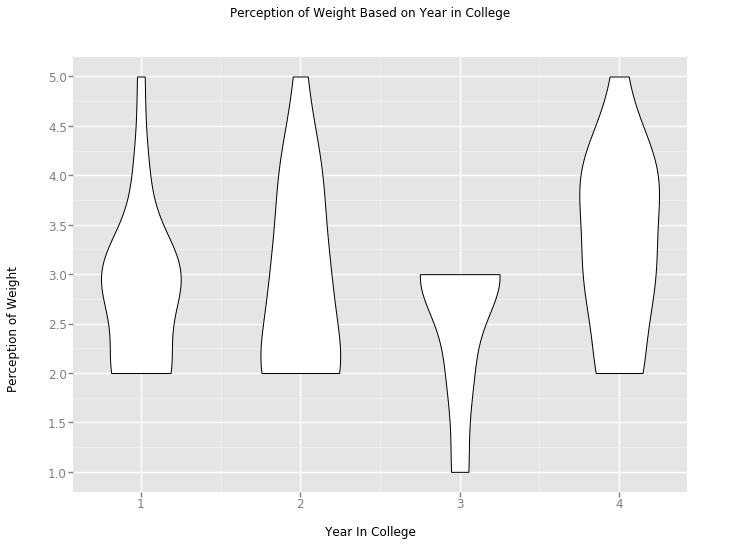

<ggplot: (-9223363260305344168)>

In [41]:
# this creates a violin plot with the desired data and labels
ggplot(aes(x='grade_level', y='self_perception_weight'), data=food) +\
    geom_violin() +\
    labs(title="Perception of Weight Based on Year in College",
         x = "Year In College",
         y = "Perception of Weight")

A violin plot shows us many useful things, specifically the distribution of data for each grade level. We see that freshmen weight perception is skewed upwards while junior weight perception is skewed downwards.

However, this doesn't tell us of any trend in particular when it comes to how weight perception changes over the years. That's okay! There are other variables we can look at, such as how a person's actual weight relates to their weight perception.

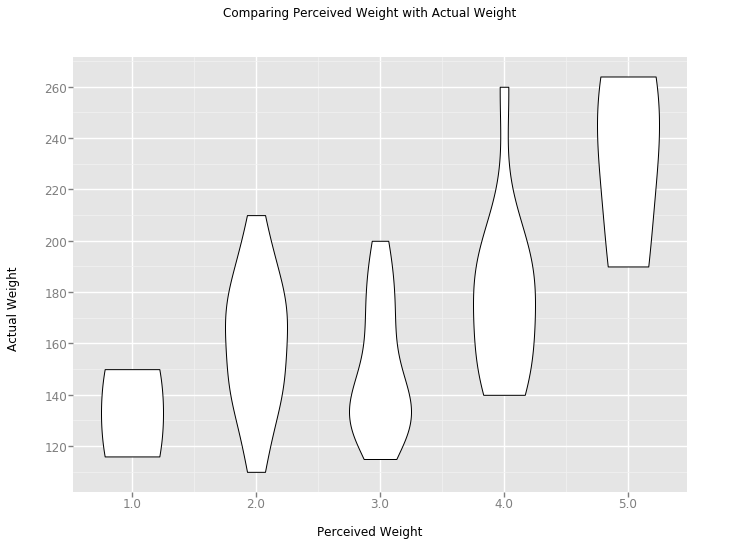

<ggplot: (8776549563512)>

In [42]:
ggplot(aes(x='self_perception_weight', y='weight'), data=food) +\
    geom_violin() +\
    labs(title="Comparing Perceived Weight with Actual Weight",
         x = "Perceived Weight",
         y = "Actual Weight")

Here, we see what appears to be a linear increasing trend where actual weight increases as perceived weight increases, which would make logical sense. The distributions for each perception rank vary; we see that the weights for a rank of 1 are fairly concentrated while the weights for a rank of 4 have a greater spread with some skew.

#### Linear Regression

Since we noticed a linear increasing trend, let's explore linear regression. It is another way we can observe a correlation between variables. Read more about linear regression [here](http://www.mit.edu/~6.s085/notes/lecture3.pdf).

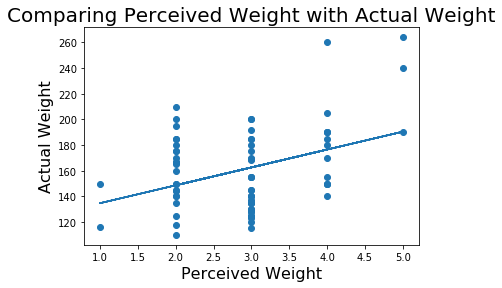

In [43]:
fig, ax = plt.subplots()
ax.set_title('Comparing Perceived Weight with Actual Weight', fontsize=20)
ax.set_xlabel('Perceived Weight', fontsize=16)
ax.set_ylabel('Actual Weight', fontsize=16)
ax.scatter(food['self_perception_weight'],food['weight'])

# we fit to a linear regression model
regr = linear_model.LinearRegression()
regr.fit(food['self_perception_weight'].values.reshape(-1,1),food['weight'])
m = regr.coef_
b = regr.intercept_

# and then plot a line of best fit
plt.plot(food['self_perception_weight'],food['self_perception_weight']*m+b,'-')
plt.show()

We have fit the data to a linear regression model and plotted a line of best fit. We acknowledge that there are relatively few data points for the 'slim' and 'overweight' responses. However, we observe a promising trend that we will further explore in the next section. For now, we explore a few other variables and examine their correlation to weight perception.

### More Exploration and Visualization 

We will take a look at how the frequency of cooking affects weight perception. Respondents were asked how often they cooked a week and provided the choices of 1 - Every day, 2 - A couple of times a week, 3 - Whenever I can, but that is not very often, 4 - I only help a little during holidays, 5 - Never, I really do not know my way around a kitchen. We create a violin plot.

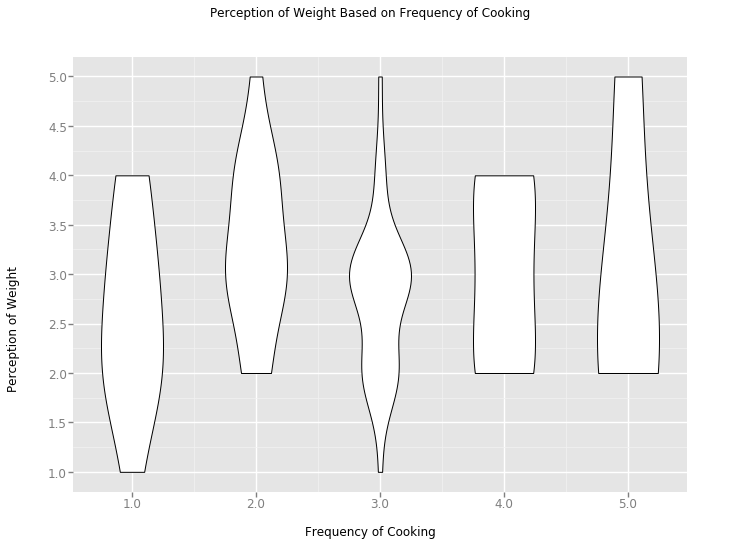

<ggplot: (8776549366974)>

In [44]:
ggplot(aes(x='cook', y='self_perception_weight'), data=food) +\
    geom_violin() +\
    labs(title="Perception of Weight Based on Frequency of Cooking",
         x = "Frequency of Cooking",
         y = "Perception of Weight")

In general, it seems that there is a linear trend, where the less they cooked, they were more likely to perceive themselves as overweight.

Next, we will take a look at how exercise affects weight perception. Respondents were asked how often they exercise a week and provided the choices of (1 - Everyday, 2 - Twice or three times per week, 3 - Once a week, 4 - Sometimes, 5 – Never). We create a violin plot.

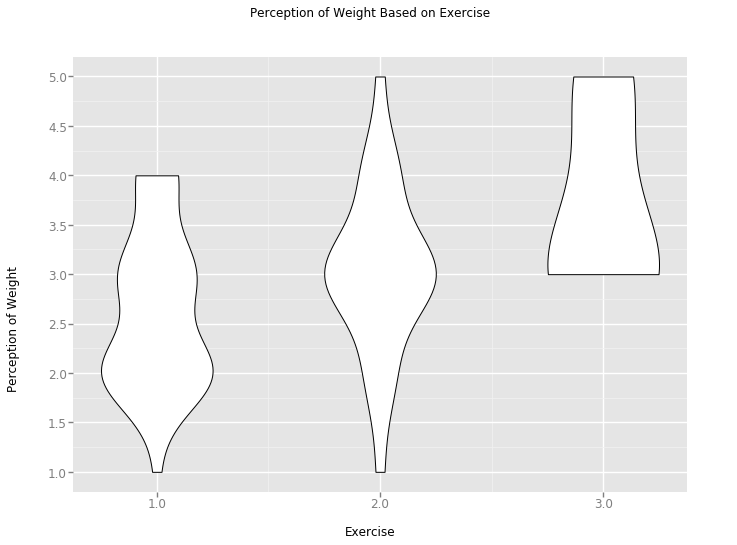

<ggplot: (-9223363260305453929)>

In [45]:
ggplot(aes(x='exercise', y='self_perception_weight'), data=food) +\
    geom_violin() +\
    labs(title="Perception of Weight Based on Exercise",
         x = "Exercise",
         y = "Perception of Weight")

In general, it seems that there is a linear trend, where the less they exercised per week, the more likely they were to perceive themselves as overweight.

Next, we will take a look at how the frequency of checking nutritional values affects weight perception. Respondents were asked how often they check nutritional values and provided the choices of 1 - never
2 - on certain products only, 3 - very rarely, 4 - on most products, 5 - on everything. We create a violin plot.

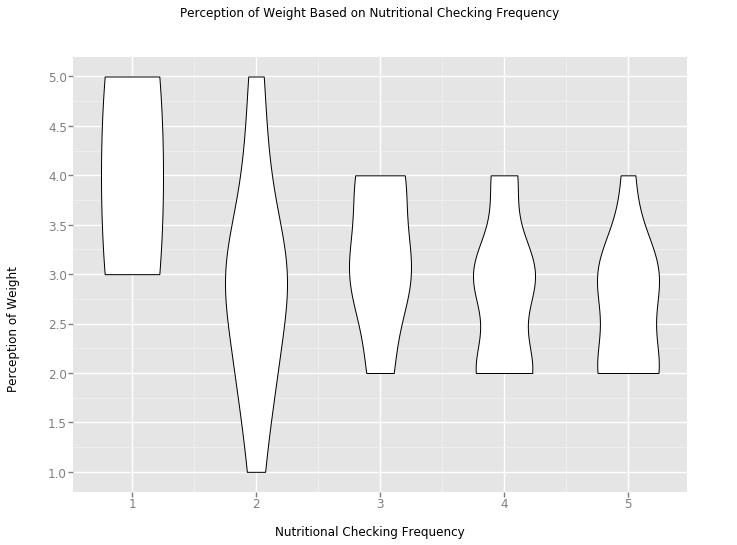

<ggplot: (-9223363260305579916)>

In [46]:
ggplot(aes(x='nutritional_check', y='self_perception_weight'), data=food) +\
    geom_violin() +\
    labs(title="Perception of Weight Based on Nutritional Checking Frequency",
         x = "Nutritional Checking Frequency",
         y = "Perception of Weight")

In general, it seems that there is a linear trend, where the less they checked nutrition, the more likely they were likely to perceive themselves as overweight.

Next, we will take a look at how the likeliness to eat veggies daily affects weight perception. 
Respondents were asked how likely they were to eat veggies in a day provided the choices of 1 - very unlikely, 2 - unlikely, 3 - neutral, 4- likely, 5 - very likely. We create a violin plot.

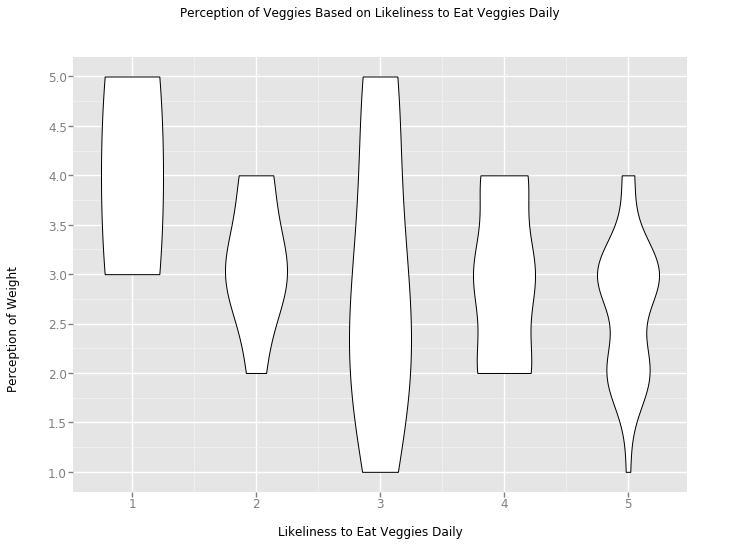

<ggplot: (-9223363260305142766)>

In [47]:
ggplot(aes(x='veggies_day', y='self_perception_weight'), data=food) +\
    geom_violin() +\
    labs(title="Perception of Veggies Based on Likeliness to Eat Veggies Daily",
         x = "Likeliness to Eat Veggies Daily",
         y = "Perception of Weight")

In general, it seems that there is a linear trend, where the less likely they were to eat veggies in a day, the more likely they were to perceive themselves as overweight.

### Machine Learning / Fitting a Model

We could continue on with these visualizations, but ultimately, our goal is to take the data we have, and see if we can use our data to accurately predict what one's perception of their weight is. In order to do this, we will experiment with several models from sci-kit learn. The models will we will try are: Decision Trees, Random Forests, Support Vector Machines, K-Nearest Neighbors, and Logistic Regression.

Before we get started, we need to do one last preparation step to our data. Much of our data is in numerical form, when the responses they represent are truly categoric. For example, "Gender" responses are 1 or 2 for Male or Female, but why should one get a higher number over the other? To remedy this, we will use one-hot encoding, which will take the current data and convert it into essentially cateogircal classes, using binary features to represent the options in each class. For example, a variable such as Gender, which has responses of 1 and 2 will be split into 2 columns: Gender_1 and Gender_2, which will be populated with 0 or 1, depending on what the response was. The benefit of one-hot encoding is that it removes any inherent ordering of values, which will make classification easier. Read more about one-hot encoding [here](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f).

Below, we will apply one-hot encoding on all features except weight and self_perception_weight (the class we aim to predict).

#### One Hot Encoding

In [48]:
# apply one-hot encoding to the dataset
food = pandas.get_dummies(food, columns = list(food.columns.values)[2:])
food.head()

,self_perception_weight,weight,Gender_1,Gender_2,calories_day_2.0,calories_day_3.0,calories_day_4.0,comfort_food_reasons_coded_1.0,comfort_food_reasons_coded_2.0,comfort_food_reasons_coded_3.0,...,pay_meal_out_6,sports_1.0,sports_2.0,veggies_day_1,veggies_day_2,veggies_day_3,veggies_day_4,veggies_day_5,vitamins_1,vitamins_2
1,3.0,155,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
3,5.0,240,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
4,4.0,190,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
5,5.0,190,1,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
6,4.0,180,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0


#### Train Test Split

We will be asssesing several classifiers based on their ability to predict the self_perception_weight class, given the remaining features. Classifiers work by taking in training data and then applying some algorithm to "learn" how to decide classes. Sci-kit learn also comes with regression models, which predict continuous values.

In any case, once we train a classifier with data, we will need to assess the accuracy of the classifier. For this reason, we need to separate the data into a training portion and a test portion. Sci-kit learn provides a train_test_split method takes our features and classes, and allows us to specify how much data we want to test on (test_size=.25 specifies 25% test data). The random_state variable is simply used to ensure we get the "same" random set each time.

In [49]:
# all but the first column are features
# the first column is the class we aim to predict
X = food[food.columns[1:]]
y = food['self_perception_weight']

# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=3)

# this will be used to keep track of our accuracies for each classifier
accuracies = {}

#### Decision Trees

Decision trees use select features of the dataset to best separate the data into distinct classes. For example, maybe if we split on gender, maybe we see that males predominantly fall into classes 1 and 3, while females fall into 2, 4, and 5. From there, we might split at each node on another feature. The process is repeated until we form a "tree" of splits, with the bottom layer "leaves" being classes. Then, when we want to predict a new observation, we can simply traverse the tree, following the decisions at each branch, and the prediction will be the class of whichever leaf we end up at. Decision trees calculate the most important features / best decisions using functions such as entropy or Gini coefficients to determine how homogenous a split is. Sklearn's decision tree classifier allows us to specify several parameters, such as how deep we want to tree to be, how many features to use, how to calculate goodness of split, among others. For more about decision trees, see [this document](https://www-users.cs.umn.edu/~kumar001/dmbook/ch4.pdf) and the [python documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [50]:
# fit to a decision tree classifer
dt_clf = tree.DecisionTreeClassifier(max_features = 20)
dt_clf.fit(X_train,y_train)

# obtain the accuracy with the score method and store into our dictionary
acc = round(dt_clf.score(X_test,y_test)*100,2)
print("Accuracy: " + str(acc) + "%")
accuracies["Decision Tree"] = acc

Accuracy: 47.37%


What actually happens in the score method is it predicts on the X_test data, and then compares with the y_test true classes.

In [51]:
print("Predictions: " + str(dt_clf.predict(X_test)))
print("True classes: " + str(numpy.array(y_test)))

Predictions: [ 2.  4.  3.  4.  3.  3.  2.  3.  2.  3.  3.  4.  4.  3.  1.  3.  3.  1.
  3.]
True classes: [ 2.  2.  3.  3.  3.  3.  3.  3.  2.  3.  3.  3.  2.  2.  2.  2.  4.  3.
  3.]


#### Random Forest

Random forest classifiers essentially work by constructing multiple decision trees, each of which produce a prediction, and then the final prediction is produced by a majority vote between each of the trees. We use Sklearn's RandomForestClassifier on our dataset. For more information about random forests see the [following source](http://dataaspirant.com/2017/05/22/random-forest-algorithm-machine-learing/), which discusses the advantages of random forests, pseudocode, applications, and more. As always, the [python documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) details the methods and examples.

In [52]:
rf_clf = RandomForestClassifier(max_features=20)
rf_clf.fit(X_train,y_train)

acc = round(rf_clf.score(X_test,y_test)*100,2)
print("Accuracy: " + str(acc) + "%")
accuracies["Random Forest"] = acc

Accuracy: 57.89%


#### Support Vector Machines

Support vector machines (SVM) use a supervised learning algorithm for the purposes of classification and regression. They are based on the concept of support vectors, which are points closest to a hyperplane that can be used to separate data points into two classes. SVMs are especially useful on smaller, cleaner datasets, but is less effective in noisier or large datasets, due to time it takes to train. We use Sklearn's SVC (support vector classifier) below. For more information about support vector machines, see the [following source](https://www.kdnuggets.com/2016/07/support-vector-machines-simple-explanation.html) and the [python documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [53]:
svm_clf = svm.SVC()
svm_clf.fit(X_train,y_train)

acc = round(svm_clf.score(X_test,y_test)*100,2)
print("Accuracy: " + str(acc) + "%")
accuracies["Support Vector Machine"] = acc

Accuracy: 52.63%


#### K-Nearest Neighbors

K-Nearest neighbors, for classification, is an algorithm that uses the majority vote of the nearest k points in terms of distance. In regression, the prediction is based on the average value of the nearest k points. For more information about how K-Nearest Neighbors works, see the [following source](https://www.analyticsvidhya.com/blog/2014/10/introduction-k-neighbours-algorithm-clustering/) and the [python documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for the KNeighborsClassifier we use below.

In [54]:
knn_clf = KNeighborsClassifier(n_neighbors=20,algorithm='brute')
knn_clf.fit(X_train,y_train)

acc = round(knn_clf.score(X_test,y_test)*100,2)
print("Accuracy: " + str(acc) + "%")
accuracies["K-Nearest Neighbors"] = acc

Accuracy: 63.16%


#### Logistic Regression

Earlier, we learned about linear regression, which is helpful for predicting a value. It takes on the form of y = mx +b.

However, when it comes to predicting a class, logistic regression is more suitable. It takes on the form of $\frac{e^x}{1+e^x}$.
For more information on logistic regression, see the [following source](http://www.dummies.com/programming/big-data/data-science/using-logistic-regression-in-python-for-data-science/) and the [python documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for LogisticRegression we use below.

In [55]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)

acc = round(lr_clf.score(X_test,y_test)*100,2)
print("Accuracy: " + str(acc) + "%")
accuracies["Logistic Regression"] = acc

Accuracy: 57.89%


#### The "Best" Model?

Now that we have fit the data to each of these models, let's see how they did. Below, we prepare a summary table with accuracies for each of the models.

In [56]:
# create a new DataFrame for the rankings
# we sort by Accuracy descending, so we see which have the highest accuracies
model_rankings = pandas.DataFrame(columns=['Classifier','Accuracy'])
for key in accuracies:
    model_rankings = model_rankings.append({'Classifier': key, 'Accuracy': accuracies.get(key)},ignore_index=True)
model_rankings.sort_values(by='Accuracy', ascending=False)

,Classifier,Accuracy
3,K-Nearest Neighbors,63.16
1,Random Forest,57.89
4,Logistic Regression,57.89
2,Support Vector Machine,52.63
0,Decision Tree,47.37


K-Fold Cross Validation

One shortcoming of our analysis you may have noticed is that we created models using only one sample of training data, and tested on one sample of test data. What if we just got lucky/unlucky, training and testing on just the right observations to get good/bad accuracies? For this reason, a standard procedure is to use something called K-fold cross validation, in which we split the data into K portions. For each of the K portions, we will use that portion as the test data, and the remaining K-1 portions as training data. Afterwards, we can combine the accuracy scores of each of the K tests to obtain a clearer idea of how strong our model is.

We attempt to do so below using sklearn's cross_val_score, which will perform the cross validation and return a list of scores. We use a 5-fold split, but you will observe a warning.

In [57]:
# attempt to do cross evaluation, which our data is not suited for
scores = cross_val_score(lr_clf,X,y,cv=5)
print(scores)

[ 0.58823529  0.47058824  0.6         0.41666667  0.33333333]


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


It appears that we have some classes that do not have enough members in certain classes, for example maybe very few people selected class 5 - Overweight, and thus using K-Fold cross validation may not actually give us a meaningful result. In ideal circumstances, we would seek a larger dataset to perform this on. For more information on cross fold validation, see [here](http://scikit-learn.org/stable/modules/cross_validation.html).

#### Analysis

Based on the our attempts to create a classifier for our data, we see that there is quite some variety in the performance of classifiers, though all are significantly better than random guessing. Since there were 5 possible classes, random guessing would achieve approximately 20% accuracy.

We see that a random forest classifier does a decent job at predicting. One last part of this tutorial is we will show you how we can asses "important" features - features that are good indicators of one's perception of weight. Classifiers often have properties such as feature importances or weights that will indicate these features. Let's see what features have high importances in our random forest classifier.

In [58]:
# creat a new DataFrame to see which features are most important
# we sort by Importance descending to see which are most important
importances = pandas.DataFrame(columns=['Feature','Importance'])
for i in range(len(X.columns)):
    importances = importances.append({'Feature': X.columns[i], 'Importance': rf_clf.feature_importances_[i]},ignore_index=True)
importances.sort_values(by='Importance',ascending=False).head(20)

,Feature,Importance
0,weight,0.115923
62,healthy_feeling_9,0.065791
4,calories_day_3.0,0.040915
102,veggies_day_3,0.027441
23,eating_changes_coded_2,0.027270
52,grade_level_3,0.026159
105,vitamins_1,0.023299
53,grade_level_4,0.022006
77,life_rewarding_8.0,0.021251
78,life_rewarding_9.0,0.021074


Because we had used one-hot encoding, we see which values of features were more important, rather than the features themselves. For example, calories_day_3.0 means those who chose 3.0 for calories_day. We see that certain responses are of more importance, but at a glance, we see certain characteristics are high up on the list, which are those we want to collect about people to understand and predict how they may perceive their weight.

### Concluding Remarks

Now we have finished our tutorial working with this data. We learned how to take a dataset, prepare it for analysis, perform exploratory data analysis, fit a classifier to our data, and gain information from our work. Clearly, we see that data science is not so clean all the time. We run into several issues above :). However, there is much more than can be done in regards to this dataset, and others! Now that we have a glimpse of some important features that may determine one's perception of their own weight, there are countless additional studies that can be done to gain further insight.

This concludes our tutorial and we hope you've learned something! Thank you!

### List of Linked Readings

NIH Articles on Self-Perception of Weight and Body Image: <br>
https://www.ncbi.nlm.nih.gov/pubmed/20142281 <br>
https://www.ncbi.nlm.nih.gov/pubmed/12726871 <br>
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3005306/ <br>
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4554432/

Data:
https://www.kaggle.com/borapajo/food-choices/data

Setting Up Python: <br>
Anaconda (https://www.anaconda.com/download/) <br>
Docker (https://docs.docker.com/engine/installation/)

Libraries: <br>
pandas (http://pandas.pydata.org/) <br>
    pandas.DataFrame.drop(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) <br>
NumPy (http://www.numpy.org/) <br>
Matplotlib (http://matplotlib.org/)<br> 
ggplot (ggplot.yhathq.com/) <br>
Scikit-learn (http://scikit-learn.org/stable/index.html) provides tools for machine learning for classification.

NLP: <br>
Introduction https://blog.algorithmia.com/introduction-natural-language-processing-nlp/ <br>
Practice https://www.datacamp.com/courses/natural-language-processing-fundamentals-in-python 

Missing Data:<br>
http://onbiostatistics.blogspot.com/2012/10/missingness-mechanism-mcar-mar-and-mnar.html <br>
https://statisticalhorizons.com/missing-at-random 

RegEx: <br>
Introduction http://www.rexegg.com/regex-quickstart.html#ref <br>
Checker https://regex101.com/

Linear Regression: <br>
http://www.mit.edu/~6.s085/notes/lecture3.pdf

One Hot Encoding: <br>
https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

Decision Trees: <br>
https://www-users.cs.umn.edu/~kumar001/dmbook/ch4.pdf <br>
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Random Forests: <br>
http://dataaspirant.com/2017/05/22/random-forest-algorithm-machine-learing/ <br>
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Support Vector Machines: <br> 
https://www.kdnuggets.com/2016/07/support-vector-machines-simple-explanation.html <br>
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 

K Nearest Neighbors: <br> 
https://www.analyticsvidhya.com/blog/2014/10/introduction-k-neighbours-algorithm-clustering/ <br>
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 

Logistic Regression: <br> 
http://www.dummies.com/programming/big-data/data-science/using-logistic-regression-in-python-for-data-science/ <br> 
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Cross Validation: <br>
http://scikit-learn.org/stable/modules/cross_validation.html  
